### MS_986 Group 11:
Group Member names: 
Ting-Chun Huang - 202369310 
Ahmed Khaled Ibrahim - 202356459 
Dehao Liu - 202367244 
Michael Werner  Mpiri - 202350903

# Regression module
 In our notebook,the module tried to identify the patterns and relationships among the features to bring out the desired outcomes in term of the popularity score of a song. We have also figured out that over the decades the factors affecting the popularity of a song have been changing, which also indicates that the music industry is also evolving as per the tastes of the audience.

## Reprocessing
We retain all numeric data for analysis and apply one-hot encoding to transform it into a format suitable for modeling to address categorical data. Furthermore, we modified the dataset based on our understanding of real-life circumstances to add more useful figures to our dataset, including combining music with year and artist, filling in missing values, etc. However, these modifications introduced significant bias, adversely affecting the predictive accuracy of the final prediction on the test dataset. Consequently, we reverted to using the original dataset without these alterations to ensure the integrity of our results.

In [1]:
# Importing necessary libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns   
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV files of training into DataFrames df
df = pd.read_csv('CS98XRegressionTrain.csv',encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


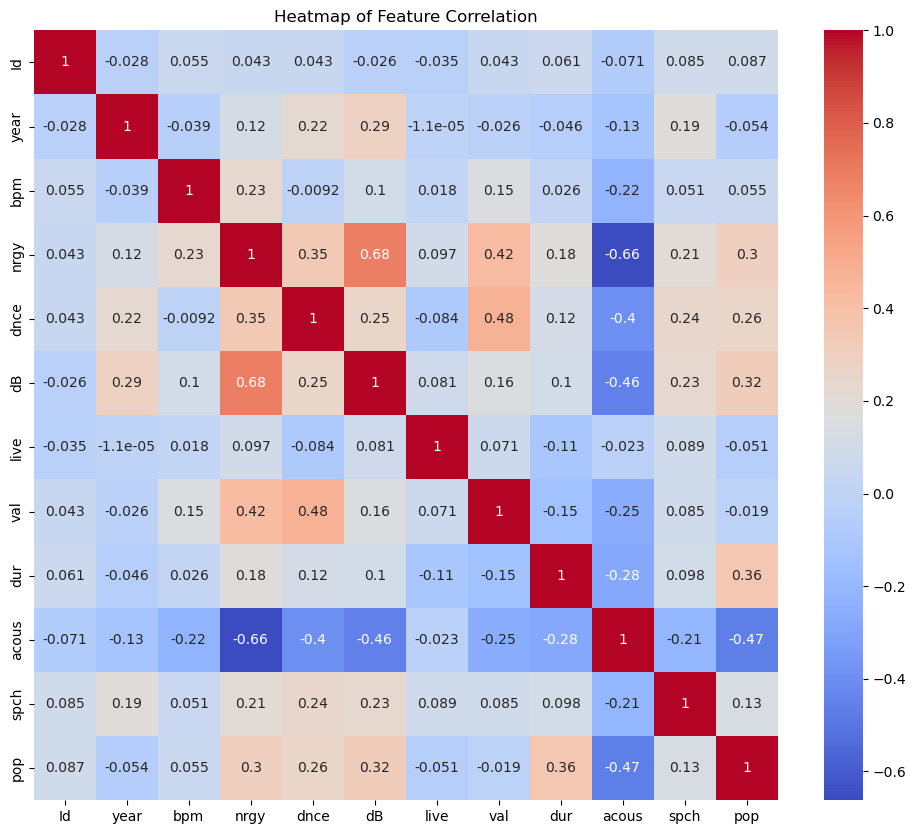

In [3]:
# Plot the heatmap, showing the correlation of training feature with predicting
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlation')
plt.show()

In [4]:
#transform categorical values in the 'artist' column of a DataFrame into a one-hot encoded representation.
onehot_encoder = OneHotEncoder(sparse=False)  

artist_onehot_encoded = onehot_encoder.fit_transform(df[['artist']])
artist_onehot_encoded_df = pd.DataFrame(artist_onehot_encoded, columns=onehot_encoder.get_feature_names_out(['artist']))

df = df.join(artist_onehot_encoded_df, lsuffix='_original', rsuffix='_onehot')

In [5]:
#drops specified columns ('title', 'artist', 'Id') from the DataFrame (df) to create a new DataFrame (df_train_figures) containing the remaining columns.
columns_to_drop = ['title','artist','Id']
df_train_figures = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)


#standardizes the numeric features in the DataFrame df_train_figures using StandardScaler
numeric_features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

scaler = StandardScaler()

df_train_figures[numeric_features] = scaler.fit_transform(df_train_figures[numeric_features])

df_train_figures = pd.get_dummies(df_train_figures, columns=['top genre'], drop_first=True)

In [6]:
df_train_figures

year       bpm      nrgy      dnce        dB      live       val  \
0    0.271894 -0.452169 -1.310624 -0.941668  0.234142 -0.344348 -1.283649   
1    1.167012 -0.174511 -0.724531 -0.424450  0.234142 -0.344348 -0.508542   
2   -0.742572 -0.531500 -1.085204  0.222073 -0.045716 -0.344348  0.307359   
3   -0.682898  2.046756 -1.445876 -0.812364 -2.004725 -0.344348 -1.079673   
4   -1.100619  0.103148 -0.589278 -0.230493  0.234142 -0.199578 -0.794108   
..        ...       ...       ...       ...       ...       ...       ...   
448 -1.936062 -1.523137 -1.716381 -2.687280 -2.284583 -0.561503 -1.773190   
449  1.107337  1.174116  0.943582 -0.424450 -1.165150  0.379502  1.490416   
450  0.629941  1.967425 -0.228605  0.868596  0.234142  0.162347  0.062588   
451  0.510592  1.848429  1.214086  0.286725  1.073717 -0.851043  1.164055   
452  0.629941 -0.531500  0.582909  0.545334  0.234142 -0.271963  1.408826   

          dur     acous      spch  ...  top genre_merseybeat  \
0   -1.197460  1.424453 -0.479767  ...                     0   
1   -1.370145  0.543019 -0.479767  ...                     0   
2    0.293907 -0.745230 -0.479767  ...                     0   
3    0.089825 -0.270612 -0.479767  ...                     0   
4   -0.522420  0.407414 -0.479767  ...                     0   
..        ...       ...       ...  ...                   ...   
448 -0.192750  2.000775 -0.299406  ...                     0   
449 -1.244556  0.576921 -0.479767  ...                     0   
450  0.984645 -0.338414  1.504199  ...                     0   
451 -0.553817 -0.948637  0.422036  ...                     0   
452  0.859056 -0.745230 -0.660127  ...                     0   

     top genre_neo mellow  top genre_new wave pop  top genre_permanent wave  \
0                       0                       0                         0   
1                       0                       0                         0   
2                       0                       0                         0   
3                       0                       0                         0   
4                       0                       0                         0   
..                    ...                     ...                       ...   
448                     0                       0                         0   
449                     0                       0                         0   
450                     0                       0                         0   
451                     0                       0                         0   
452                     0                       0                         0   

     top genre_pop  top genre_r&b  top genre_rock-and-roll  \
0                0              0                        0   
1                0              0                        0   
2                0              0                        0   
3                0              0                        0   
4                0              0                        0   
..             ...            ...                      ...   
448              0              0                        0   
449              0              0                        0   
450              0              0                        0   
451              0              0                        0   
452              0              0                        0   

     top genre_soft rock  top genre_uk garage  top genre_yodeling  
0                      0                    0                   0  
1                      0                    0                   0  
2                      0                    0                   0  
3                      0                    0                   0  
4                      0                    0                   0  
..                   ...                  ...                 ...  
448                    0                    0                   0  
449                    0                    0                   0  
450      

In [7]:
#the dataset into training and testing sets, with 80% of the data used for training and 20% for testing, while also assigning the training features to X_train.
X = df_train_figures.drop(['pop'], axis=1)
y = df_train_figures['pop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Tuning
In this process, we began by testing various basic models and using Root Mean Square Error (RMSE) on the training data to determine their effectiveness. The differences in performance of basic models are minor, therefore we chose the best-performing ones by using the voting strategy. Besides, we applied hyperparameter tuning with grid search to enhance their performance to find the optimal settings, then we used cross-validation for a more accurate evaluation. To further improve our model accuracy, the bagging strategy was implemented to create many various subsets of the original dataset, which resulted in a more accurate and robust predictive model.

In [8]:
#Optimizes a Random Forest Regressor using RandomizedSearchCV, evaluates its performance,constructs a Voting Regressor ensemble with optimized models from grid search, followed by fitting a Bagging Regressor on top and evaluating its performance on test data.
param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configure RandomizedSearchCV to optimize the Random Forest Regressor.
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50, 
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train, y_train)
# Extract the best parameters.
print("Best parameters:", random_search.best_params_)


best_model = random_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)


rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
print(f'Optimized Random Forest Regressor RMSE: {rmse_optimized:.4f}')
rmse_optimized


# Define parameter grids for different regressors to be used in grid search.
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
param_grid_gbr = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}
param_grid_svr = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}


# Initialize regressor instances with a fixed random state for reproducibility.
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
svr = SVR()

# Configure GridSearchCV with specified parameter grids.
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Find the best model parameters for each regressor.
grid_search_rf.fit(X_train, y_train)
grid_search_gbr.fit(X_train, y_train)
grid_search_svr.fit(X_train, y_train)

# Extract the best estimator for each regressor.
best_rf = grid_search_rf.best_estimator_
best_gbr = grid_search_gbr.best_estimator_
best_svr = grid_search_svr.best_estimator_

# Construct a Voting Regressor ensemble with the optimized models.
voting_reg = VotingRegressor(estimators=[('rf', best_rf), ('gbr', best_gbr), ('svr', best_svr)])

voting_reg.fit(X_train, y_train)


y_pred = voting_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"VOTING RMSE: {rmse}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Optimized Random Forest Regressor RMSE: 11.2283
VOTING RMSE: 10.71552365257033


In [9]:
voting_reg

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=42)),
                            ('gbr', GradientBoostingRegressor(random_state=42)),
                            ('svr', SVR(C=10))])

In [10]:
bagging_model = BaggingRegressor(estimator=voting_reg, n_estimators=10, random_state=42)

bagging_model.fit(X_train, y_train)


y_pred_bagging = bagging_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print(f"BEGGING RMSE: {rmse}")

BEGGING RMSE: 10.84095881905858


In [11]:
bagging_model

BaggingRegressor(estimator=VotingRegressor(estimators=[('rf',
                                                        RandomForestRegressor(n_estimators=200,
                                                                              random_state=42)),
                                                       ('gbr',
                                                        GradientBoostingRegressor(random_state=42)),
                                                       ('svr', SVR(C=10))]),
                 random_state=42)

## Preporcess and Predict the Target Dataset
In the final process, we applied the same preprocessing steps as used with the training data to the imported target dataset. Due to the differences in the 'top genre' categories between the test and training datasets, we merged the one-hot encoded columns to align the shape of the datasets. Consequently, we re-fit the Begging model with modified training data and make the prediction of the target data.

In [12]:
# Now read the CSV files of test dataset into DataFrames df_test
df_test = pd.read_csv('CS98XRegressionTest.csv')
#save a copy of test dataset for the final prediction output file
df_test_copy=df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         114 non-null    int64 
 1   title      114 non-null    object
 2   artist     114 non-null    object
 3   top genre  113 non-null    object
 4   year       114 non-null    int64 
 5   bpm        114 non-null    int64 
 6   nrgy       114 non-null    int64 
 7   dnce       114 non-null    int64 
 8   dB         114 non-null    int64 
 9   live       114 non-null    int64 
 10  val        114 non-null    int64 
 11  dur        114 non-null    int64 
 12  acous      114 non-null    int64 
 13  spch       114 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 12.6+ KB


In [13]:
# preporocess the dataset as same as the training dataset

artist_onehot_encoded = onehot_encoder.fit_transform(df_test[['artist']])


artist_onehot_encoded_df_test = pd.DataFrame(artist_onehot_encoded, columns=onehot_encoder.get_feature_names_out(['artist']))
df_test = df_test.join(artist_onehot_encoded_df, lsuffix='_original', rsuffix='_onehot')

df_test['top genre'] = df_test['top genre'].fillna('Unknown')
columns_to_drop = ['title','artist','Id']
df_prediction = df_test.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)


In [14]:
#Standardizes the numeric features in the prediction DataFrame using StandardScaler and then performs one-hot encoding on the 'top genre' column, dropping the first encoded column to avoid multicollinearity issues.
numeric_features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

scaler = StandardScaler()

df_prediction[numeric_features] = scaler.fit_transform(df_prediction[numeric_features])

df_prediction = pd.get_dummies(df_prediction, columns=['top genre'], drop_first=True)

In [15]:
#alignment between the features of the training and prediction datasets before using the Bagging Regressor model to predict the target variable for the prediction dataset.
for column in X_train.columns:
    if column not in df_prediction.columns:
        df_prediction[column] = 0

for column in df_prediction.columns:
    if column not in X_train.columns:
        df_prediction.drop(column, axis=1, inplace=True)
df_prediction = df_prediction[X_train.columns]

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Columns: 440 entries, year to top genre_yodeling
dtypes: float64(355), uint8(85)
memory usage: 1.3 MB


In [17]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Columns: 440 entries, year to top genre_yodeling
dtypes: float64(355), int64(58), uint8(27)
memory usage: 371.0 KB


In [18]:
#fit the model with all the data from the training dataset and predict the test dataset
bagging_model.fit(X, y)
result_pred = bagging_model.predict(df_prediction)

In [19]:
# generate the prediction output file
df_test_copy['pop']=result_pred
predictions_df = df_test_copy[['Id','pop']]
predictions_df.to_csv('predictions.csv', index=False)

## Summary:
Our final prediction score was 7.60786 up to the time we uploaded, which placed us in the top third of the leaderboard in the Kaggle competition. While our predictive model shows potential for further optimization, we encountered challenges related to computational resources, as optimizing for better parameters required exponentially more computing power. Additionally, as the model runs the "black box", it was difficult to interpret some results that contradicted our expectations. We also observed that adding more features to the original data introduced more bias, leading to suboptimal predictions. Despite these issues, our model still provided relatively good predictions, representing a challenging yet rewarding endeavor in machine learning.
